In [83]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/heart_disease_uci.csv')
print(myData.shape)

(920, 16)


In [84]:
peek = myData.head(10)
print(peek)

   id  age     sex    dataset               cp  trestbps   chol    fbs         restecg  thalch  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True  lv hypertrophy   150.0   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False  lv hypertrophy   108.0   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False  lv hypertrophy   129.0   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False          normal   187.0   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False  lv hypertrophy   172.0   
5   6   56    Male  Cleveland  atypical angina     120.0  236.0  False          normal   178.0   
6   7   62  Female  Cleveland     asymptomatic     140.0  268.0  False  lv hypertrophy   160.0   
7   8   57  Female  Cleveland     asymptomatic     120.0  354.0  False          normal   163.0   
8   9   63    Male  Cleveland     asymptomatic     130.0  254.0  False  lv hypertrophy   147.0   
9  10   53    Male  

In [85]:
shape = myData.shape
print(shape)

(920, 16)


In [86]:
types = myData.dtypes
print(types)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [87]:
outcome_counts = myData.groupby('num').size()
print(outcome_counts)

num
0    411
1    265
2    109
3    107
4     28
dtype: int64


In [88]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

             id    age  trestbps   chol  thalch  oldpeak     ca    num
id        1.000  0.239     0.053 -0.377  -0.466    0.050  0.061  0.274
age       0.239  1.000     0.244 -0.086  -0.366    0.258  0.370  0.340
trestbps  0.053  0.244     1.000  0.093  -0.105    0.162  0.094  0.122
chol     -0.377 -0.086     0.093  1.000   0.236    0.048  0.052 -0.232
thalch   -0.466 -0.366    -0.105  0.236   1.000   -0.151 -0.264 -0.366
oldpeak   0.050  0.258     0.162  0.048  -0.151    1.000  0.282  0.443
ca        0.061  0.370     0.094  0.052  -0.264    0.282  1.000  0.516
num       0.274  0.340     0.122 -0.232  -0.366    0.443  0.516  1.000


<AxesSubplot:ylabel='Frequency'>

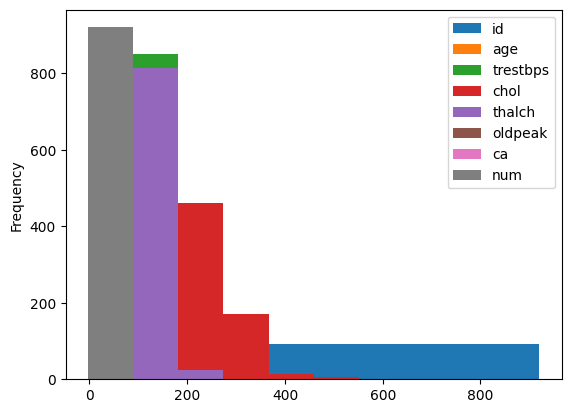

In [89]:
import matplotlib.pyplot as plt
myData.plot.hist()

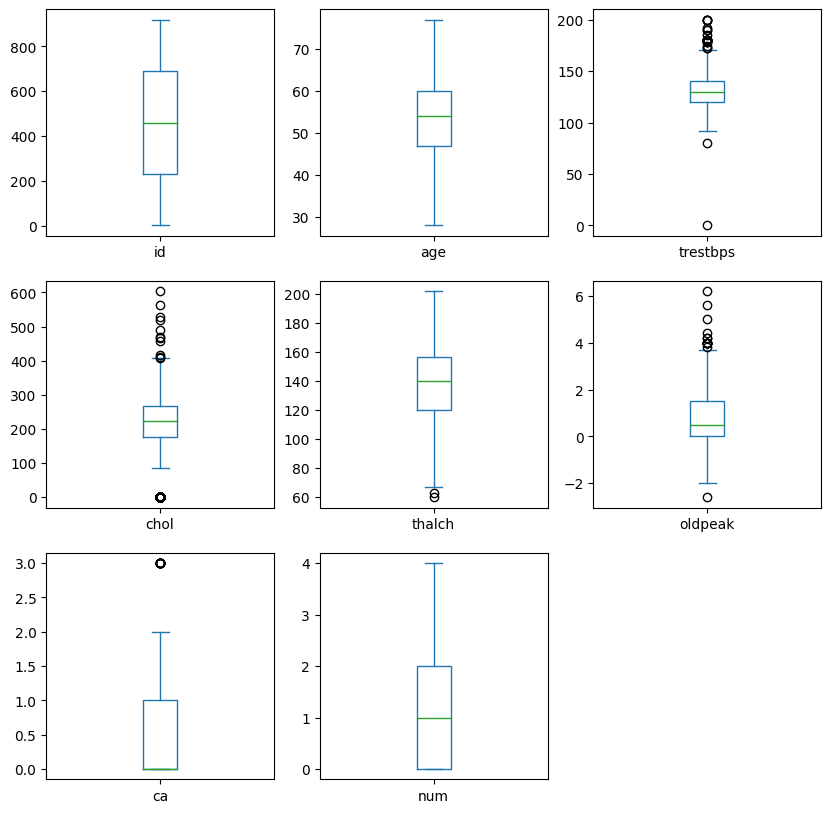

In [90]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

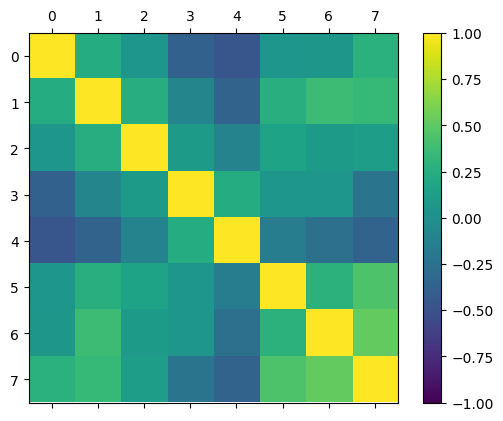

In [91]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111)
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [92]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [93]:
X = myData.drop('num', axis=1).values
Y = myData['num'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.022 0.735 1.    0.    1.    0.55  0.35  0.    0.    0.592 0.5   0.5
  0.333 0.    0.333]
 [0.023 0.612 0.    0.    1.    0.75  0.469 0.5   0.    0.718 0.    0.409
  0.667 0.    0.333]
 [0.024 0.612 1.    0.    0.333 0.6   0.471 0.    0.    0.704 0.    0.5
  0.333 0.    0.333]
 [0.025 0.612 1.    0.    0.667 0.66  0.371 0.    0.    0.796 0.    0.659
  0.667 0.667 0.667]
 [0.026 0.653 1.    0.    0.    0.65  0.342 0.    0.    0.507 0.5   0.568
  0.333 0.667 0.667]]


In [94]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('num', axis=1).values
mydata_label = myData['num'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.073 0.224 0.003 0.    0.01  0.384 0.737 0.    0.    0.503 0.003 0.006
  0.003 0.    0.003]
 [0.06  0.159 0.    0.    0.008 0.412 0.777 0.003 0.    0.445 0.    0.003
  0.005 0.    0.003]
 [0.065 0.164 0.003 0.    0.003 0.34  0.805 0.    0.    0.453 0.    0.005
  0.003 0.    0.003]
 [0.075 0.182 0.003 0.    0.006 0.414 0.703 0.    0.    0.543 0.    0.01
  0.006 0.006 0.006]
 [0.088 0.211 0.004 0.    0.    0.457 0.724 0.    0.    0.464 0.004 0.008
  0.004 0.007 0.007]]


In [95]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.]]


In [96]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('num', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('num', axis=1).values
mydata_label = myData['num'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[  0.63   15.016  16.982   0.14   63.235   6.193   0.31    2.262   3.537
  61.235  53.854  96.204  45.876 110.651  35.041]


In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False False False False False False False False  True False
  True  True  True]
Feature Ranking: [11  9  3  2  4 10 12  7  6  8  1  5  1  1  1]


In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.804 0.15  0.027]
[[ 9.627e-01  3.599e-03  1.956e-04  2.054e-03 -6.278e-04 -3.201e-03
  -2.677e-01  9.503e-04  1.143e-03 -3.868e-02  2.367e-04 -8.188e-04
   1.678e-04  4.388e-04  1.153e-03]
 [ 2.671e-01  2.767e-02 -1.966e-03 -1.121e-03 -1.843e-03  4.164e-02
   9.623e-01 -1.004e-03 -8.685e-04 -1.257e-02  4.557e-04  9.558e-05
   8.513e-05  1.761e-03 -6.020e-04]
 [-4.265e-02  1.820e-01  1.188e-03  4.939e-04 -1.175e-02  1.385e-01
  -1.213e-02  8.930e-04 -1.757e-03 -9.721e-01  7.574e-03  1.904e-02
  -1.069e-02  1.134e-02  3.681e-03]]


In [99]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(308, 2)


In [100]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(308, 3)


In [101]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier


myData['num'] = pd.cut(myData['num'], bins=3, labels=[0, 1, 2])
mydata_label = myData['num'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.077 0.075 0.029 0.007 0.075 0.073 0.076 0.034 0.038 0.095 0.052 0.114
 0.058 0.129 0.068]
